## More Exploratory Data Analysis
Code written and edited by Julia Taussig

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import r2_score, accuracy_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn import svm
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

%matplotlib inline 

In [2]:
#Reading in the data: (since we can choose the number of samples, we are choosing the larger dataset (more samples))
df = pd.read_csv('./data/large_train_sample.csv')

In [3]:
#Inspecting the head of the dataframe:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 14)

In [5]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
wage              object
dtype: object

- age: continuous
- workclass: 
  - Private 
  - Self-emp-not-inc 
  - Self-emp-inc
  - Federal-gov 
  - Local-gov 
  - State-gov 
  - Without-pay 
  - Never-worked
- fnlwgt: continuous
  -  People with similar demographic characteristics should have similar weights.  There is one important caveat to remember about this statement.  That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.
- education: 
  - Bachelors 
  - Some-college 
  - 11th 
  - HS-grad 
  - Prof-school 
  - Assoc-acdm 
  - Assoc-voc 
  - 9th 
  - 7th-8th 
  - 12th 
  - Masters 
  - 1st-4th 
  - 10th 
  - Doctorate 
  - 5th-6th 
  - Preschool
- education-num: continuous
- marital-status: 
  - Married-civ-spouse 
  - Divorced
  - Never-married
  - Separated
  - Widowed
  - Married-spouse-absent
  - Married-AF-spouse
- occupation: 
  - Tech-support, 
  - Craft-repair, 
  - Other-service, 
  - Sales, 
  - Exec-managerial, 
  - Prof-specialty, 
  - Handlers-cleaners, 
  - Machine-op-inspct, 
  - Adm-clerical, 
  - Farming-fishing, 
  - Transport-moving, 
  - Priv-house-serv, 
  - Protective-serv, 
  - Armed-Forces.
- relationship: 
  - Wife, 
  - Own-child, 
  - Husband, 
  - Not-in-family, 
  - Other-relative, 
  - Unmarried.
- race: 
  - White, 
  - Asian-Pac-Islander, 
  - Amer-Indian-Eskimo, 
  - Other, 
  - Black.
- sex: 
  - Female, 
  - Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: 
  - United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [5]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [27]:
df[df['education'] == ' Preschool']['wage'].value_counts(normalize=True)

 <=50K    1.0
Name: wage, dtype: float64

In [28]:
df[df['education'] == ' 1st-4th']['wage'].value_counts(normalize=True)

 <=50K    0.964286
 >50K     0.035714
Name: wage, dtype: float64

In [29]:
df[df['education'] == ' 5th-6th']['wage'].value_counts(normalize=True)

 <=50K    0.951952
 >50K     0.048048
Name: wage, dtype: float64

In [30]:
df[df['education'] == ' 7th-8th']['wage'].value_counts(normalize=True)

 <=50K    0.93808
 >50K     0.06192
Name: wage, dtype: float64

In [31]:
df[df['education'] == ' 9th']['wage'].value_counts(normalize=True)

 <=50K    0.947471
 >50K     0.052529
Name: wage, dtype: float64

In [32]:
df[df['education'] == ' 10th']['wage'].value_counts(normalize=True)

 <=50K    0.933548
 >50K     0.066452
Name: wage, dtype: float64

In [33]:
df[df['education'] == ' 11th']['wage'].value_counts(normalize=True)

 <=50K    0.948936
 >50K     0.051064
Name: wage, dtype: float64

In [34]:
df[df['education'] == ' 12th']['wage'].value_counts(normalize=True)

 <=50K    0.923788
 >50K     0.076212
Name: wage, dtype: float64

In [35]:
df[df['education'] == ' HS-grad']['wage'].value_counts(normalize=True)

 <=50K    0.840491
 >50K     0.159509
Name: wage, dtype: float64

In [36]:
df[df['education'] == ' Some-college']['wage'].value_counts(normalize=True)

 <=50K    0.809765
 >50K     0.190235
Name: wage, dtype: float64

In [37]:
df[df['education'] == ' Assoc-acdm']['wage'].value_counts(normalize=True)

 <=50K    0.75164
 >50K     0.24836
Name: wage, dtype: float64

In [38]:
df[df['education'] == ' Assoc-voc']['wage'].value_counts(normalize=True)

 <=50K    0.738784
 >50K     0.261216
Name: wage, dtype: float64

In [39]:
df[df['education'] == ' Bachelors']['wage'].value_counts(normalize=True)

 <=50K    0.585247
 >50K     0.414753
Name: wage, dtype: float64

In [40]:
df[df['education'] == ' Masters']['wage'].value_counts(normalize=True)

 >50K     0.556587
 <=50K    0.443413
Name: wage, dtype: float64

In [41]:
df[df['education'] == ' Prof-school']['wage'].value_counts(normalize=True)

 >50K     0.734375
 <=50K    0.265625
Name: wage, dtype: float64

In [42]:
df[df['education'] == ' Doctorate']['wage'].value_counts(normalize=True)

 >50K     0.74092
 <=50K    0.25908
Name: wage, dtype: float64

In [50]:
#Per Anne Kerr's suggestion, conda installed pandas profiling:
#conda install -c conda-forge pandas-profiling 
import pandas_profiling
#Sources: 
#https://github.com/pandas-profiling/pandas-profiling
#https://nbviewer.jupyter.org/github/JosPolfliet/pandas-profiling/blob/master/examples/meteorites.ipynb
#https://anaconda.org/conda-forge/pandas-profiling

In [51]:
pandas_profiling.ProfileReport(df)

Number of variables,14
Number of observations,32561
Total Missing (%),0.0%
Total size in memory,3.5 MiB
Average record size in memory,112.0 B
Numeric,6
Categorical,8
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [ ]:
#df['']

In [17]:
#Dropping education number since education column more descriptive:
df.drop(labels = 'education-num', axis = 1, inplace = True)

In [53]:
#Checking whether have null values - None!  Yay!
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wage              0
dtype: int64

In [45]:
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [50]:
df[df['marital-status'] == ' Married-civ-spouse']['wage'].value_counts(normalize = True)

 <=50K    0.553152
 >50K     0.446848
Name: wage, dtype: float64

In [51]:
df[df['marital-status'] == ' Never-married']['wage'].value_counts(normalize = True)

 <=50K    0.954039
 >50K     0.045961
Name: wage, dtype: float64

In [52]:
df[df['marital-status'] == ' Divorced']['wage'].value_counts(normalize = True)

 <=50K    0.895791
 >50K     0.104209
Name: wage, dtype: float64

In [53]:
df[df['marital-status'] == ' Separated']['wage'].value_counts(normalize = True)

 <=50K    0.93561
 >50K     0.06439
Name: wage, dtype: float64

In [54]:
df[df['marital-status'] == ' Widowed']['wage'].value_counts(normalize = True)

 <=50K    0.914401
 >50K     0.085599
Name: wage, dtype: float64

In [55]:
df[df['marital-status'] == ' Married-spouse-absent']['wage'].value_counts(normalize = True)

 <=50K    0.91866
 >50K     0.08134
Name: wage, dtype: float64

In [56]:
df[df['marital-status'] == ' Married-AF-spouse']['wage'].value_counts(normalize = True)

 <=50K    0.565217
 >50K     0.434783
Name: wage, dtype: float64

In [102]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [57]:
df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [106]:
len(df['sex'].value_counts())

2

In [105]:
len(df['native-country'].value_counts())

42

In [108]:
df['wage'].value_counts(normalize=True)

 <=50K    0.75919
 >50K     0.24081
Name: wage, dtype: float64

In [58]:
df[df['relationship'] == ' Husband']['wage'].value_counts(normalize = True)

 <=50K    0.551429
 >50K     0.448571
Name: wage, dtype: float64

In [59]:
df[df['relationship'] == ' Not-in-family']['wage'].value_counts(normalize = True)

 <=50K    0.89693
 >50K     0.10307
Name: wage, dtype: float64

In [60]:
df[df['relationship'] == ' Own-child']['wage'].value_counts(normalize = True)

 <=50K    0.98678
 >50K     0.01322
Name: wage, dtype: float64

In [61]:
df[df['relationship'] == ' Unmarried']['wage'].value_counts(normalize = True)

 <=50K    0.936738
 >50K     0.063262
Name: wage, dtype: float64

In [62]:
df[df['relationship'] == ' Wife']['wage'].value_counts(normalize = True)

 <=50K    0.524872
 >50K     0.475128
Name: wage, dtype: float64

In [63]:
df[df['relationship'] == ' Other-relative']['wage'].value_counts(normalize = True)

 <=50K    0.962283
 >50K     0.037717
Name: wage, dtype: float64

In [67]:
#df['fnlwgt'].corr()

In [8]:
#Creating dummies:
df_dum = pd.get_dummies(df) #, drop_first = True)

In [9]:
#Inspecting the df with dummies:
df_dum.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,wage_ <=50K,wage_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
#df_dum.dtypes

In [45]:
#Looking at the numerical features and how they correlate to 
#each other and the number of deaths (the target variable)
# plt.figure(figsize = (8,6))

# corr = df_dum.corr()

# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# sns.heatmap(corr, mask = mask, cmap = 'coolwarm', annot = True); 

In [31]:
#df_dum['wage_ >50K'].value_counts()

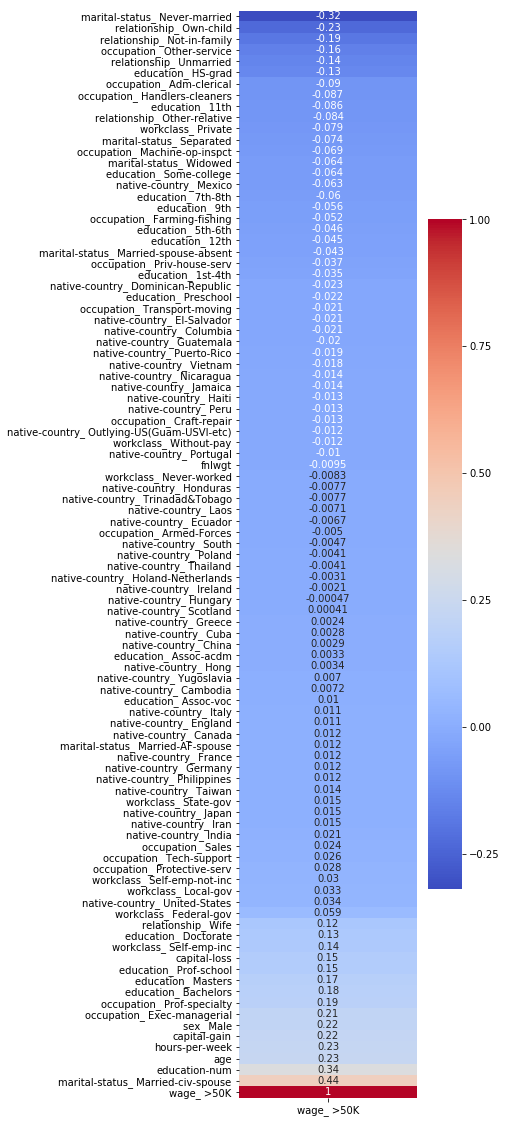

In [70]:
#Looking at the numerical features and how they correlate to the total number of deaths (the target variable):
plt.figure(figsize = (4,20))
sns.heatmap(df_dum.corr()[['wage_ >50K']].sort_values('wage_ >50K'), annot=True, cmap='coolwarm')

In [71]:
df_dum.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 11th',
       'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th',
       'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm',
       'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate',
       'education_ HS-grad', 'education_ Masters', 'education_ Preschool',
       'education_ Prof-school', 'education_ Some-college',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Armed-Force

Education columns
'education_ 11th',
'education_ 12th', 
'education_ 1st-4th', 
'education_ 5th-6th',
'education_ 7th-8th', 
'education_ 9th', 
'education_ Assoc-acdm',
'education_ Assoc-voc', 
'education_ Bachelors', 
'education_ Doctorate',
'education_ HS-grad', 
'education_ Masters', 
'education_ Preschool',
'education_ Prof-school', 
'education_ Some-college',
    
The one that was dropped:
education_ 10th

In [72]:
#Creating another dummy column: whether finished high school:

list_HSgrad = []
for i in range(len(df_dum['education_ Bachelors'])):
    if (df_dum.iloc[i]['education_ Some-college'] == 1) | (
    df_dum.iloc[i]['education_ Bachelors'] == 1) | (
    df_dum.iloc[i]['education_ HS-grad'] == 1) | (
    df_dum.iloc[i]['education_ Prof-school'] == 1) | (
    df_dum.iloc[i]['education_ Assoc-acdm'] == 1) | (
    df_dum.iloc[i]['education_ Assoc-voc'] == 1) | (
    df_dum.iloc[i]['education_ Masters'] == 1) | (
    df_dum.iloc[i]['education_ Doctorate'] == 1):    
        list_HSgrad.append(1)
    else:
        list_HSgrad.append(0) 

In [73]:
pd.set_option('display.max_columns', 100)
df_dum['education_HSgrad'] = list_HSgrad
df_dum.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Male,native-country_ Cambodia,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,wage_ >50K,education_HSgrad
0,39,77516,13,2174,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,50,83311,13,0,0,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,38,215646,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,53,234721,7,0,0,40,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,28,338409,13,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


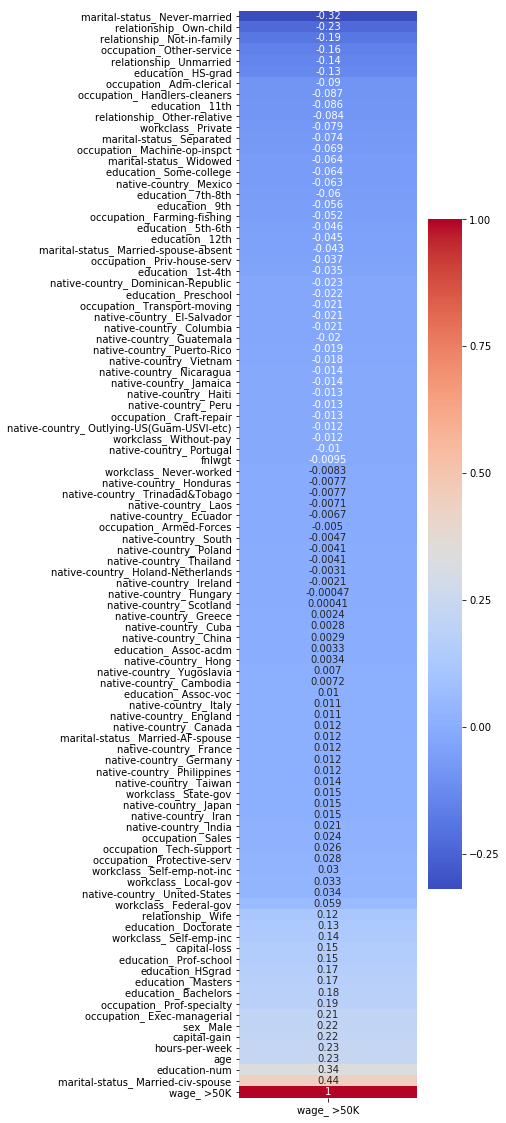

In [74]:
#Looking at the numerical features and how they correlate to the total number of deaths (the target variable):
plt.figure(figsize = (4,20))
sns.heatmap(df_dum.corr()[['wage_ >50K']].sort_values('wage_ >50K'), annot=True, cmap='coolwarm')

In [75]:
df_dum.corr()[['wage_ >50K']].sort_values('wage_ >50K')

,wage_ >50K
marital-status_ Never-married,-0.318440
relationship_ Own-child,-0.228532
relationship_ Not-in-family,-0.188497
occupation_ Other-service,-0.156348
relationship_ Unmarried,-0.142857
education_ HS-grad,-0.131189
occupation_ Adm-clerical,-0.089986
occupation_ Handlers-cleaners,-0.087265
education_ 11th,-0.085864
relationship_ Other-relative,-0.083716


In [77]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [79]:
df[df['occupation'] == ' Prof-specialty']['wage'].value_counts(normalize = True)

 <=50K    0.550966
 >50K     0.449034
Name: wage, dtype: float64

In [80]:
df[df['occupation'] == ' Craft-repair']['wage'].value_counts(normalize = True)

 <=50K    0.773359
 >50K     0.226641
Name: wage, dtype: float64

In [81]:
df[df['occupation'] == ' Exec-managerial']['wage'].value_counts(normalize = True)

 <=50K    0.515986
 >50K     0.484014
Name: wage, dtype: float64

In [82]:
df[df['occupation'] == ' Adm-clerical']['wage'].value_counts(normalize = True)

 <=50K    0.865517
 >50K     0.134483
Name: wage, dtype: float64

In [83]:
df[df['occupation'] == ' Sales']['wage'].value_counts(normalize = True)

 <=50K    0.730685
 >50K     0.269315
Name: wage, dtype: float64

In [84]:
df[df['occupation'] == ' Other-service']['wage'].value_counts(normalize = True)

 <=50K    0.958422
 >50K     0.041578
Name: wage, dtype: float64

In [85]:
df[df['occupation'] == ' Machine-op-inspct']['wage'].value_counts(normalize = True)

 <=50K    0.875125
 >50K     0.124875
Name: wage, dtype: float64

In [86]:
df[df['occupation'] == ' ?']['wage'].value_counts(normalize = True)

 <=50K    0.896365
 >50K     0.103635
Name: wage, dtype: float64

In [88]:
df[df['occupation'] == ' Transport-moving']['wage'].value_counts(normalize = True)

 <=50K    0.799624
 >50K     0.200376
Name: wage, dtype: float64

In [89]:
df[df['occupation'] == ' Handlers-cleaners']['wage'].value_counts(normalize = True)

 <=50K    0.937226
 >50K     0.062774
Name: wage, dtype: float64

In [90]:
df[df['occupation'] == ' Farming-fishing']['wage'].value_counts(normalize = True)

 <=50K    0.884306
 >50K     0.115694
Name: wage, dtype: float64

In [91]:
df[df['occupation'] == ' Tech-support']['wage'].value_counts(normalize = True)

 <=50K    0.695043
 >50K     0.304957
Name: wage, dtype: float64

In [92]:
df[df['occupation'] == ' Protective-serv']['wage'].value_counts(normalize = True)

 <=50K    0.674884
 >50K     0.325116
Name: wage, dtype: float64

In [93]:
df[df['occupation'] == ' Priv-house-serv']['wage'].value_counts(normalize = True)

 <=50K    0.993289
 >50K     0.006711
Name: wage, dtype: float64

In [94]:
df[df['occupation'] == ' Armed-Forces']['wage'].value_counts(normalize = True)

 <=50K    0.888889
 >50K     0.111111
Name: wage, dtype: float64

In [74]:
df.groupby(by = 'workclass').mean()[['wage_>50k']].sort_values(by='wage_>50k', ascending = False)

,wage_>50k
workclass,
Self-emp-inc,0.557348
Federal-gov,0.386458
Local-gov,0.294792
Self-emp-not-inc,0.284927
State-gov,0.271957
Private,0.218673
?,0.104031
Never-worked,0.000000
Without-pay,0.000000


In [75]:

workclass_col = [col  for col in df_dum.columns if 'workclass' in col]
workclass_col
# for col in df_dum.columns:
#     if 'workclass' in col:
#         print(col)
workclass_col.append('wage_ >50K')

In [76]:
df_dum[workclass_col].corr()[['wage_ >50K']].sort_values(by = 'wage_ >50K', ascending = False)

,wage_ >50K
wage_ >50K,1.000000
workclass_ Self-emp-inc,0.139467
workclass_ Federal-gov,0.059372
workclass_ Local-gov,0.033091
workclass_ Self-emp-not-inc,0.030019
workclass_ State-gov,0.014843
workclass_ Never-worked,-0.008259
workclass_ Without-pay,-0.011681
workclass_ ?,-0.078198
workclass_ Private,-0.078528


In [55]:
wage_list = []
for i in df['wage']:
    if i == ' >50K':
        wage_list.append(1)
    else:
        wage_list.append(0)

In [56]:
df['wage_>50k'] = wage_list

In [57]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage,wage_>50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K,0


In [59]:
df['wage_>50k'].value_counts(normalize = True)

0    0.75919
1    0.24081
Name: wage_>50k, dtype: float64

In [71]:
#df.groupby(by = 'education').mean()[['wage']].sort_values(by='wage')
df.groupby(by = 'education').mean()[['wage_>50k']].sort_values(by='wage_>50k', ascending = False)

,wage_>50k
education,
Doctorate,0.740920
Prof-school,0.734375
Masters,0.556587
Bachelors,0.414753
Assoc-voc,0.261216
Assoc-acdm,0.248360
Some-college,0.190235
HS-grad,0.159509
12th,0.076212


In [94]:
education_col = [col  for col in df_dum.columns if 'education_' in col]
education_col
education_col.append('wage_ >50K')

In [95]:
#education_col

In [96]:
df_dum[education_col].corr()[['wage_ >50K']].sort_values(by = 'wage_ >50K', ascending = False)

,wage_ >50K
wage_ >50K,1.000000
education_ Bachelors,0.180485
education_ Masters,0.174570
education_ Prof-school,0.154907
education_ Doctorate,0.132572
education_ Assoc-voc,0.010048
education_ Assoc-acdm,0.003250
education_ Preschool,-0.022307
education_ 1st-4th,-0.034544
education_ 12th,-0.044690


In [77]:
df.groupby(by = 'marital-status').mean()[['wage_>50k']].sort_values(by='wage_>50k', ascending = False)

,wage_>50k
marital-status,
Married-civ-spouse,0.446848
Married-AF-spouse,0.434783
Divorced,0.104209
Widowed,0.085599
Married-spouse-absent,0.081340
Separated,0.064390
Never-married,0.045961


In [78]:
marital_col = [col  for col in df_dum.columns if 'marital' in col]
marital_col.append('wage_ >50K')
marital_col

['marital-status_ Divorced',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'wage_ >50K']

In [79]:
df_dum[marital_col].corr()[['wage_ >50K']].sort_values(by = 'wage_ >50K', ascending = False)

,wage_ >50K
wage_ >50K,1.000000
marital-status_ Married-civ-spouse,0.444696
marital-status_ Married-AF-spouse,0.012061
marital-status_ Married-spouse-absent,-0.042532
marital-status_ Widowed,-0.064381
marital-status_ Separated,-0.074386
marital-status_ Divorced,-0.126995
marital-status_ Never-married,-0.318440


In [80]:
df.groupby(by = 'occupation').mean()[['wage_>50k']].sort_values(by='wage_>50k', ascending = False)

,wage_>50k
occupation,
Exec-managerial,0.484014
Prof-specialty,0.449034
Protective-serv,0.325116
Tech-support,0.304957
Sales,0.269315
Craft-repair,0.226641
Transport-moving,0.200376
Adm-clerical,0.134483
Machine-op-inspct,0.124875


In [81]:
occupation_col = [col  for col in df_dum.columns if 'occupation' in col]
occupation_col.append('wage_ >50K')
occupation_col

['occupation_ ?',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Prof-specialty',
 'occupation_ Protective-serv',
 'occupation_ Sales',
 'occupation_ Tech-support',
 'occupation_ Transport-moving',
 'wage_ >50K']

In [82]:
df_dum[occupation_col].corr()[['wage_ >50K']].sort_values(by = 'wage_ >50K', ascending = False)

,wage_ >50K
wage_ >50K,1.000000
occupation_ Exec-managerial,0.214861
occupation_ Prof-specialty,0.185866
occupation_ Protective-serv,0.028118
occupation_ Tech-support,0.025696
occupation_ Sales,0.023688
occupation_ Armed-Forces,-0.005044
occupation_ Craft-repair,-0.012576
occupation_ Transport-moving,-0.021476
occupation_ Priv-house-serv,-0.037122


In [83]:
df.groupby(by = 'relationship').mean()[['wage_>50k']].sort_values(by='wage_>50k', ascending = False)

,wage_>50k
relationship,
Wife,0.475128
Husband,0.448571
Not-in-family,0.103070
Unmarried,0.063262
Other-relative,0.037717
Own-child,0.013220


In [84]:
relationship_col = [col  for col in df_dum.columns if 'relationship' in col]
relationship_col.append('wage_ >50K')
relationship_col

['relationship_ Husband',
 'relationship_ Not-in-family',
 'relationship_ Other-relative',
 'relationship_ Own-child',
 'relationship_ Unmarried',
 'relationship_ Wife',
 'wage_ >50K']

In [85]:
df_dum[relationship_col].corr()[['wage_ >50K']].sort_values(by = 'wage_ >50K', ascending = False)

,wage_ >50K
wage_ >50K,1.000000
relationship_ Husband,0.401035
relationship_ Wife,0.123264
relationship_ Other-relative,-0.083716
relationship_ Unmarried,-0.142857
relationship_ Not-in-family,-0.188497
relationship_ Own-child,-0.228532


In [86]:
df.groupby(by = 'sex').mean()[['wage_>50k']].sort_values(by='wage_>50k', ascending = False)

,wage_>50k
sex,
Male,0.305737
Female,0.109461


In [87]:
sex_col = [col  for col in df_dum.columns if 'sex' in col]
sex_col.append('wage_ >50K')
sex_col

['sex_ Female', 'sex_ Male', 'wage_ >50K']

In [88]:
df_dum[sex_col].corr()[['wage_ >50K']].sort_values(by = 'wage_ >50K', ascending = False)

,wage_ >50K
wage_ >50K,1.00000
sex_ Male,0.21598
sex_ Female,-0.21598


In [89]:
df['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [90]:
df.groupby(by = 'native-country').mean()[['wage_>50k']].sort_values(by='wage_>50k', ascending = False)

,wage_>50k
native-country,
Iran,0.418605
France,0.413793
India,0.400000
Taiwan,0.392157
Japan,0.387097
Yugoslavia,0.375000
Cambodia,0.368421
Italy,0.342466
England,0.333333


In [91]:
country_col = [col  for col in df_dum.columns if 'native-country' in col]
country_col.append('wage_ >50K')
country_col

['native-country_ ?',
 'native-country_ Cambodia',
 'native-country_ Canada',
 'native-country_ China',
 'native-country_ Columbia',
 'native-country_ Cuba',
 'native-country_ Dominican-Republic',
 'native-country_ Ecuador',
 'native-country_ El-Salvador',
 'native-country_ England',
 'native-country_ France',
 'native-country_ Germany',
 'native-country_ Greece',
 'native-country_ Guatemala',
 'native-country_ Haiti',
 'native-country_ Holand-Netherlands',
 'native-country_ Honduras',
 'native-country_ Hong',
 'native-country_ Hungary',
 'native-country_ India',
 'native-country_ Iran',
 'native-country_ Ireland',
 'native-country_ Italy',
 'native-country_ Jamaica',
 'native-country_ Japan',
 'native-country_ Laos',
 'native-country_ Mexico',
 'native-country_ Nicaragua',
 'native-country_ Outlying-US(Guam-USVI-etc)',
 'native-country_ Peru',
 'native-country_ Philippines',
 'native-country_ Poland',
 'native-country_ Portugal',
 'native-country_ Puerto-Rico',
 'native-country_ Scotl

In [92]:
df_dum[country_col].corr()[['wage_ >50K']].sort_values(by = 'wage_ >50K', ascending = False)

,wage_ >50K
wage_ >50K,1.000000
native-country_ United-States,0.034470
native-country_ India,0.020664
native-country_ Iran,0.015121
native-country_ Japan,0.014944
native-country_ Taiwan,0.014020
native-country_ Philippines,0.012306
native-country_ Germany,0.012216
native-country_ France,0.012079
native-country_ Canada,0.011642


In [93]:
df['wage'].value_counts(normalize = True)

 <=50K    0.75919
 >50K     0.24081
Name: wage, dtype: float64

In [100]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage,wage_>50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K,0


In [101]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_numeric = df.select_dtypes(include=numerics)
df_numeric.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,wage_>50k
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


In [104]:
df_numeric.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,wage_>50k
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
wage_>50k,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


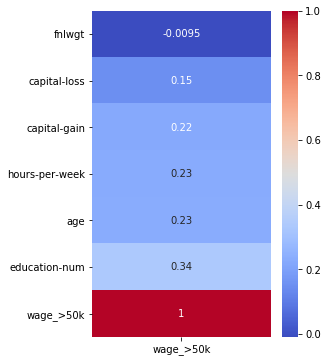

In [106]:
#Looking at the numerical features and how they correlate to the total number of deaths (the target variable):
plt.figure(figsize = (4,6))
sns.heatmap(df_numeric.corr()[['wage_>50k']].sort_values('wage_>50k'), annot=True, cmap='coolwarm')

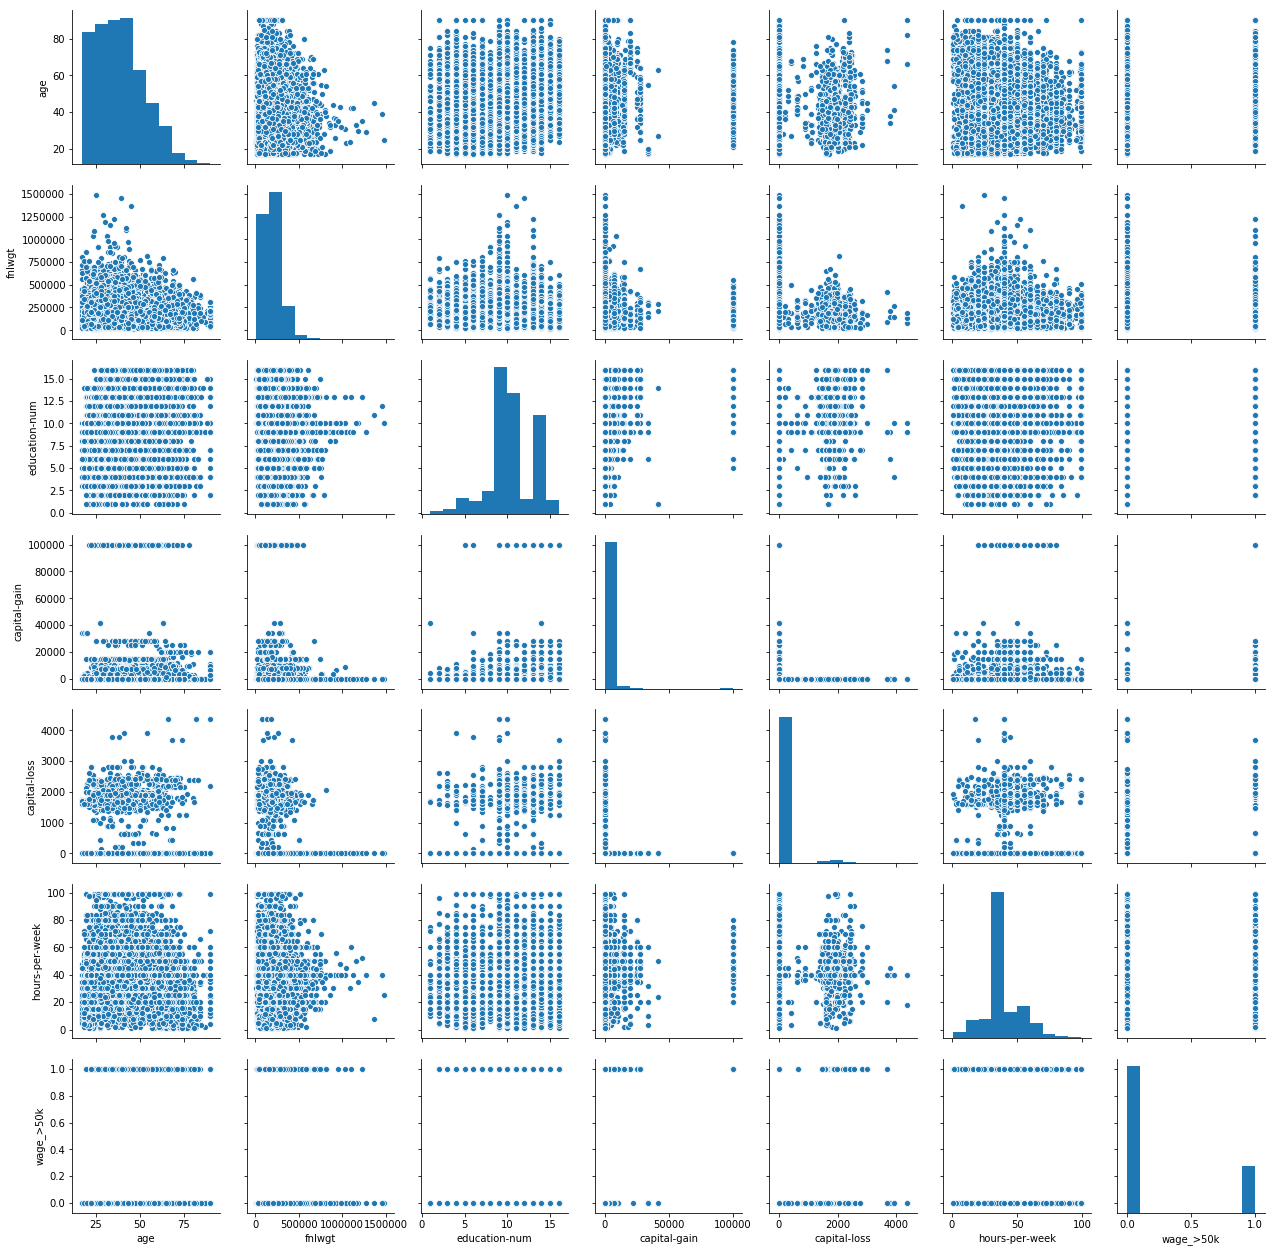

In [107]:
sns.pairplot(df_numeric)

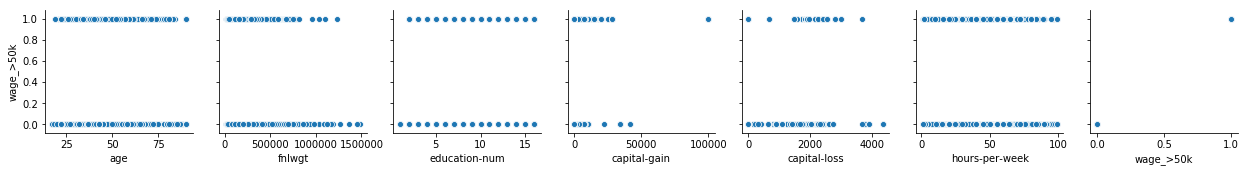

In [109]:
sns.pairplot(df_numeric, x_vars = df_numeric.columns, y_vars = 'wage_>50k')

Text(0, 0.5, 'Frequency (Count)')

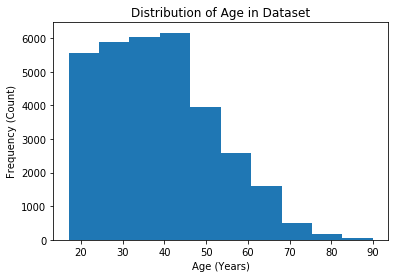

In [115]:
plt.hist(df_numeric['age'])
plt.title('Distribution of Age in Dataset')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency (Count)')

Text(0, 0.5, 'Frequency (Count)')

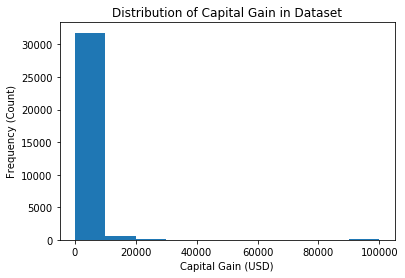

In [116]:
plt.hist(df_numeric['capital-gain'])
plt.title('Distribution of Capital Gain in Dataset')
plt.xlabel('Capital Gain (USD)')
plt.ylabel('Frequency (Count)')

Text(0, 0.5, 'Frequency (Count)')

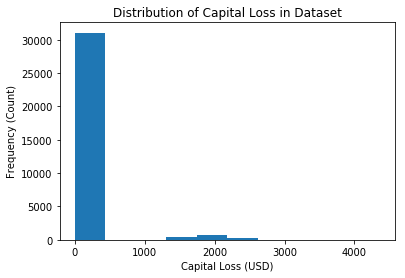

In [117]:
plt.hist(df_numeric['capital-loss'])
plt.title('Distribution of Capital Loss in Dataset')
plt.xlabel('Capital Loss (USD)')
plt.ylabel('Frequency (Count)')

Text(0, 0.5, 'Frequency (Count)')

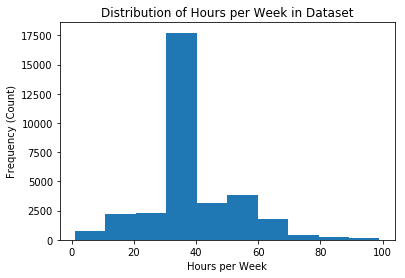

In [118]:
plt.hist(df_numeric['hours-per-week'])
plt.title('Distribution of Hours per Week in Dataset')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency (Count)')

Text(0, 0.5, 'Frequency (Count)')

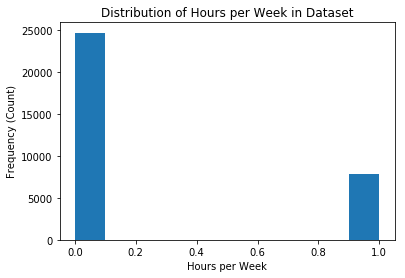

In [119]:
plt.hist(df_numeric['wage_>50k'])
plt.title('Distribution of Wage >50k USD in Dataset')
plt.xlabel('Wage >50k USD (0 if No, 1 if Yes)')
plt.ylabel('Frequency (Count)')